In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Data Collection and Preprocessing

In [6]:
data = pd.read_csv('heart.csv')

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
data.shape

(1025, 14)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
data.isnull().sum()
# no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
# checking statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
# checking the distribution of target values
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
# Data Visualization

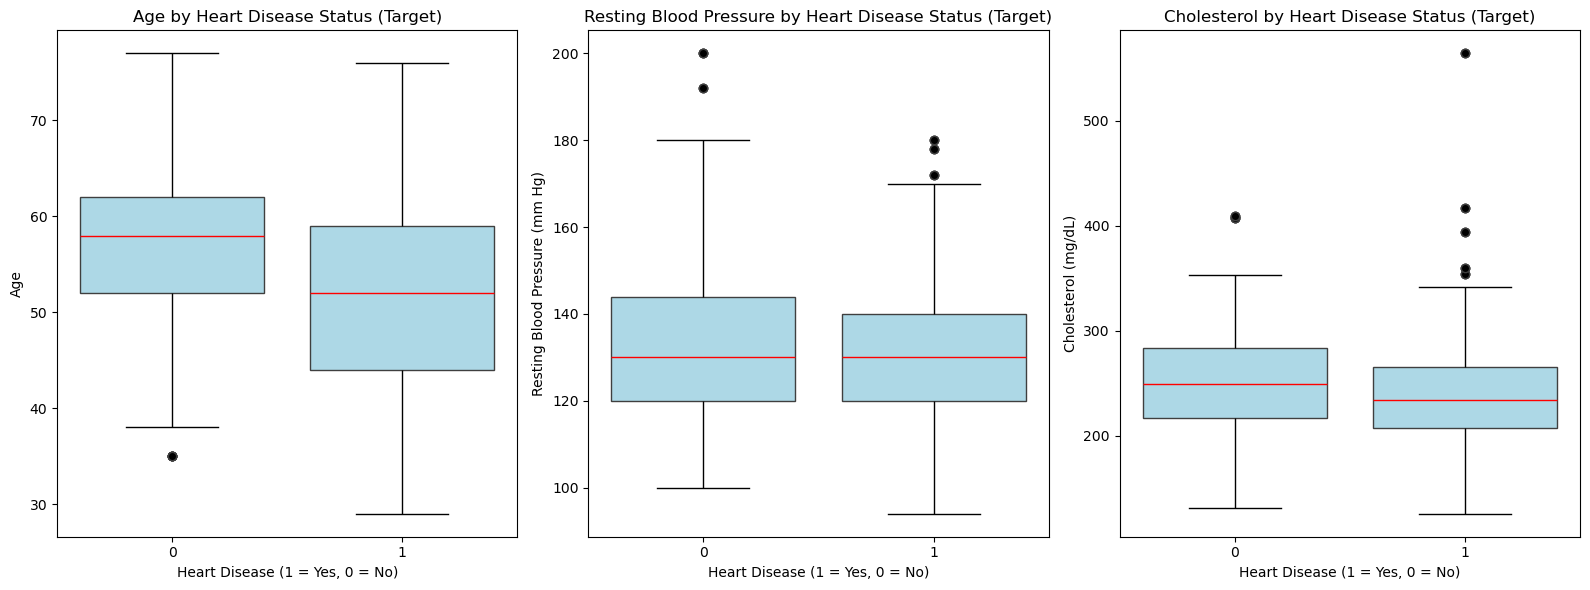

In [36]:
#Comparing the distribution of continuous variables
plt.figure(figsize=(16, 6))

# Subplot for Age
plt.subplot(1, 3, 1)
sns.boxplot(x='target', y='age', data=data, patch_artist=True,  # Fill the boxes with color
                    boxprops=dict(facecolor='lightblue'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='red'),
                    flierprops=dict(marker='o', markerfacecolor='black'))
plt.title('Age by Heart Disease Status (Target)')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Age')

# Subplot for Resting Blood Pressure
plt.subplot(1, 3, 2)
sns.boxplot(x='target', y='trestbps', data=data, patch_artist=True,  # Fill the boxes with color
                    boxprops=dict(facecolor='lightblue'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='red'),
                    flierprops=dict(marker='o', markerfacecolor='black'))
plt.title('Resting Blood Pressure by Heart Disease Status (Target)')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Resting Blood Pressure (mm Hg)')

# Subplot for Cholesterol
plt.subplot(1, 3, 3)
sns.boxplot(x='target', y='chol', data=data, patch_artist=True,  # Fill the boxes with color
                    boxprops=dict(facecolor='lightblue'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='red'),
                    flierprops=dict(marker='o', markerfacecolor='black'))
plt.title('Cholesterol by Heart Disease Status (Target)')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Cholesterol (mg/dL)')

plt.tight_layout()
plt.show()

In [46]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")


In [54]:
# Comparing categorical variables with target

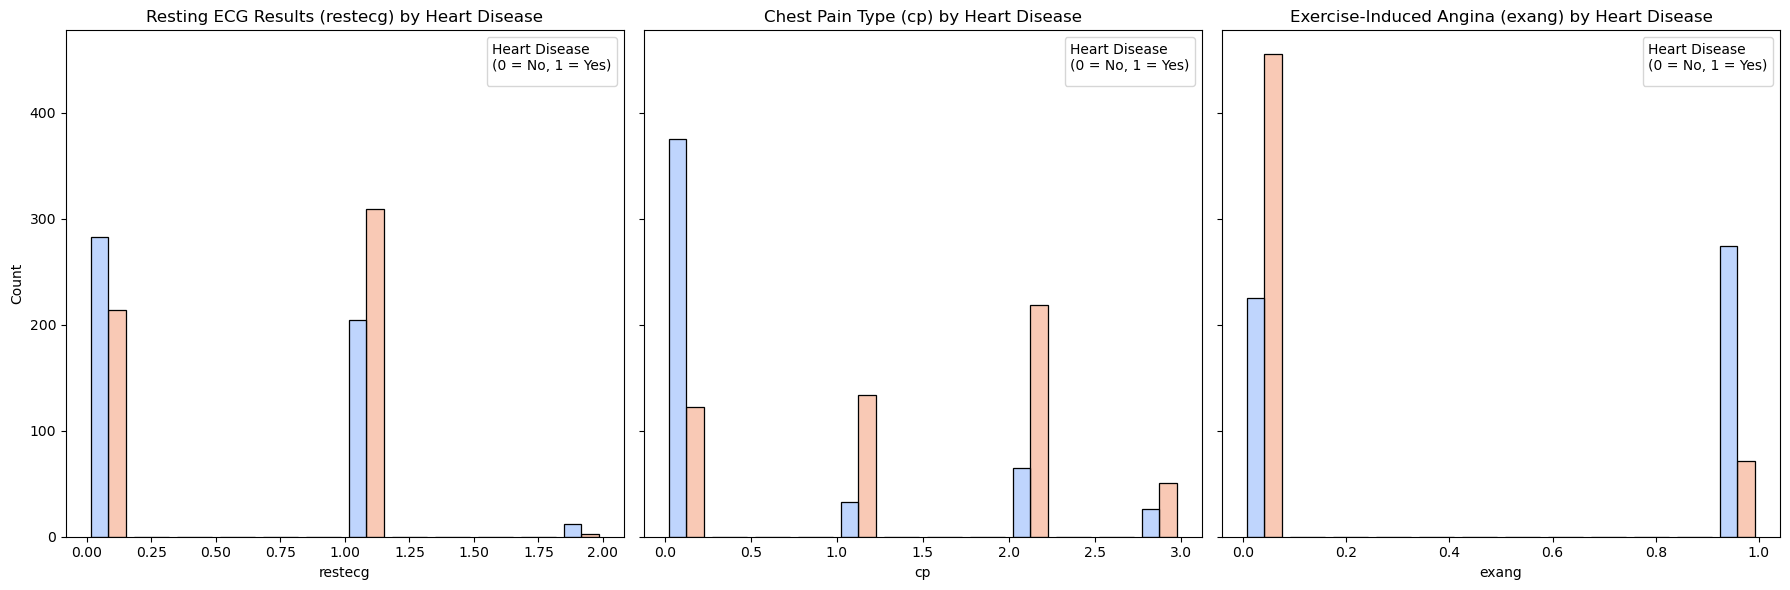

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define the categorical columns and titles
categories = ['restecg', 'cp', 'exang']
titles = [
    "Resting ECG Results (restecg) by Heart Disease",
    "Chest Pain Type (cp) by Heart Disease",
    "Exercise-Induced Angina (exang) by Heart Disease"
]

# Loop through each category to create histograms
for i, (cat, title) in enumerate(zip(categories, titles)):
    sns.histplot(
        data=data,
        x=cat,
        hue='target',
        multiple='dodge',
        palette='coolwarm',
        shrink=0.8,
        ax=axes[i]
    )
    axes[i].set_title(title)
    axes[i].set_xlabel(cat)
    axes[i].set_ylabel("Count" if i == 0 else "")  # Show y-label only for the first plot
    axes[i].legend(title="Heart Disease\n(0 = No, 1 = Yes)")

plt.tight_layout()
plt.show()


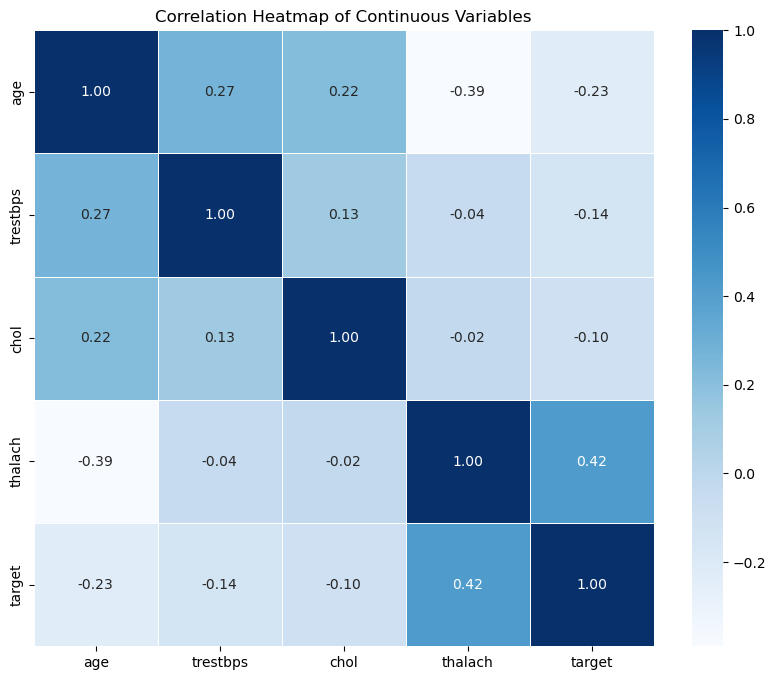

In [86]:
# Shows relationships between continuous variables
plt.figure(figsize=(10, 8))

continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'target']
corr_matrix = data[continuous_cols].corr()


# Generating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

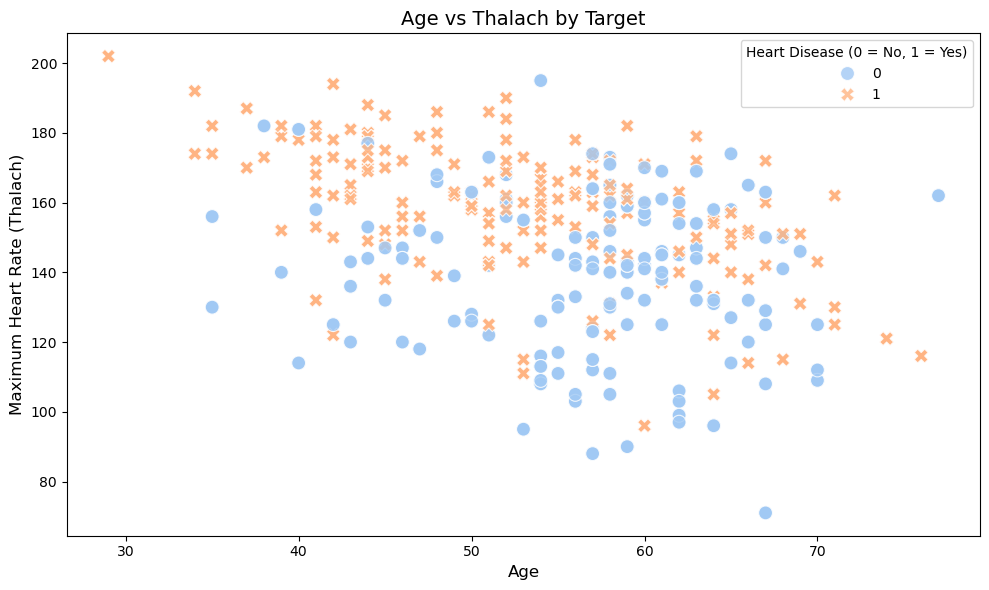

In [92]:
# Examine relationships between two continuous variables by target
sns.set_palette("pastel")

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x='age', 
    y='thalach', 
    hue='target', 
    style='target', 
    palette='pastel', 
    s=100, 
    alpha=0.8
)

# Add labels and title
plt.title("Age vs Thalach by Target", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Maximum Heart Rate (Thalach)", fontsize=12)
plt.legend(title="Heart Disease (0 = No, 1 = Yes)", loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


In [94]:
y = data['target']
X = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Results")
print("Model Accuracy:", accuracy_log_reg)
print("\nClassification Report:\n", classification_rep_log_reg)
print("\nConfusion Matrix:\n", conf_matrix_log_reg)

Logistic Regression Results
Model Accuracy: 0.7853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205


Confusion Matrix:
 [[71 31]
 [13 90]]


In [142]:
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Results")
print("Model Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_rep_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)


Random Forest Results
Model Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
 [[102   0]
 [  3 100]]


In [148]:
# K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("\nK-Nearest Neighbors (KNN) Results")
print("Model Accuracy:", accuracy_knn)
print("\nClassification Report:\n", classification_rep_knn)
print("\nConfusion Matrix:\n", conf_matrix_knn)


K-Nearest Neighbors (KNN) Results
Model Accuracy: 0.7317073170731707

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205


Confusion Matrix:
 [[74 28]
 [27 76]]


In [150]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("\nDecision Tree Results")
print("Model Accuracy:", accuracy_dt)
print("\nClassification Report:\n", classification_rep_dt)
print("\nConfusion Matrix:\n", conf_matrix_dt)


Decision Tree Results
Model Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
 [[102   0]
 [  3 100]]


In [156]:
new_data = pd.DataFrame({
    'age': [58],
    'sex': [0],  # Assuming 1 for male and 0 for female
    'cp': [0],  # Chest pain type
    'trestbps': [100],  # Resting blood pressure
    'chol': [248],  # Serum cholesterol
    'fbs': [0],  # Fasting blood sugar
    'restecg': [0],  # Resting electrocardiographic results
    'thalach': [122],  # Maximum heart rate achieved
    'exang': [0],  # Exercise induced angina
    'oldpeak': [1],  # Depression induced by exercise relative to rest
    'slope': [1],  # Slope of the peak exercise ST segment
    'ca': [0],  # Number of major vessels colored by fluoroscopy
    'thal': [2]  # Thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)
})

# Predicting the probability of heart disease using Random Forest
prob_rf = rf_model.predict_proba(new_data)[:, 1]  # Probability for the positive class (heart disease)
print(f"Random Forest: Probability of having heart disease: {prob_rf[0]*100:.2f}%")

# Predicting the probability of heart disease using Decision Tree
prob_dt = dt_model.predict_proba(new_data)[:, 1]  # Probability for the positive class (heart disease)
print(f"Decision Tree: Probability of having heart disease: {prob_dt[0]*100:.2f}%")

Random Forest: Probability of having heart disease: 99.00%
Decision Tree: Probability of having heart disease: 100.00%


In [158]:
# Performance summary
results = {
    "Model": ["Decision Tree", "Random Forest", "KNN", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_log_reg)
    ]
}


results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Decision Tree,0.985366
1,Random Forest,0.985366
3,Logistic Regression,0.785366
2,KNN,0.731707


In [ ]:
#  SO RANDOM FOREST IS ONE OF THE FINEST AND ACCURATE MODEL AMONG ALL THE MODELS

In [164]:
filename = 'rf_model.pkl'

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)